# Working with Old Spatial Transcriptomics data

In [1]:
import stlearn as st

D:\Anaconda3\envs\stlearn\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
data = st.ReadOldST(count_matrix_file="../UQ/ST_BrainInjuryModel/JVQN_Brain_6_S6_stdata.tsv",
                    spatial_file="../UQ/ST_BrainInjuryModel/Preprocessed/Brain6_extracted_full.tsv",
                    image_file="../UQ/ST_BrainInjuryModel/ClearBackground/Brain6.jpg")

Added tissue image to the object!


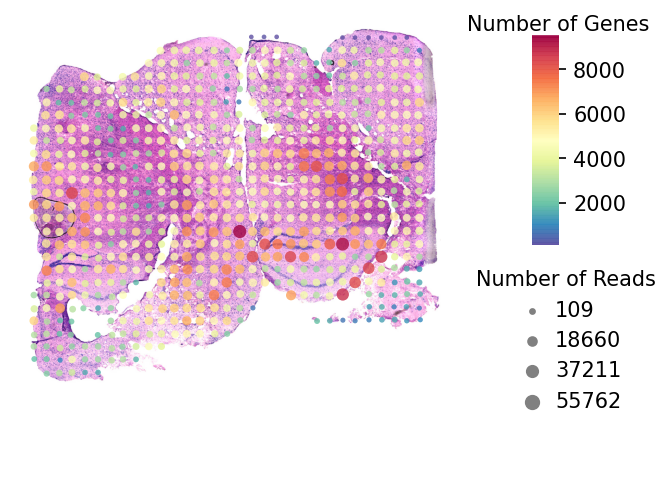

In [3]:
st.pl.QC_plot(data,dpi=150)

Run preprocessing for count data

In [4]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

filtered out 5883 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


Run PCA

In [5]:
st.em.run_pca(data,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Create k-nearest-neigbor graph

In [18]:
st.pp.neighbors(data,n_neighbors=30,use_rep='X_pca',random_state=0)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


Run and plot louvain clustering

In [19]:
st.tl.clustering.louvain(data,random_state=0)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


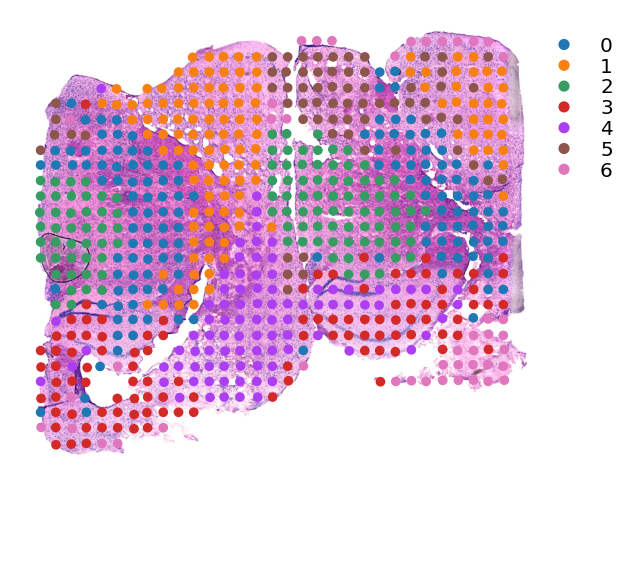

In [20]:
st.pl.cluster_plot(data,use_label="louvain",tissue_alpha=1,spot_size=15,show_legend=True)

Run and plot k-means clustering

In [15]:
st.tl.clustering.kmeans(data,n_clusters=5)

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


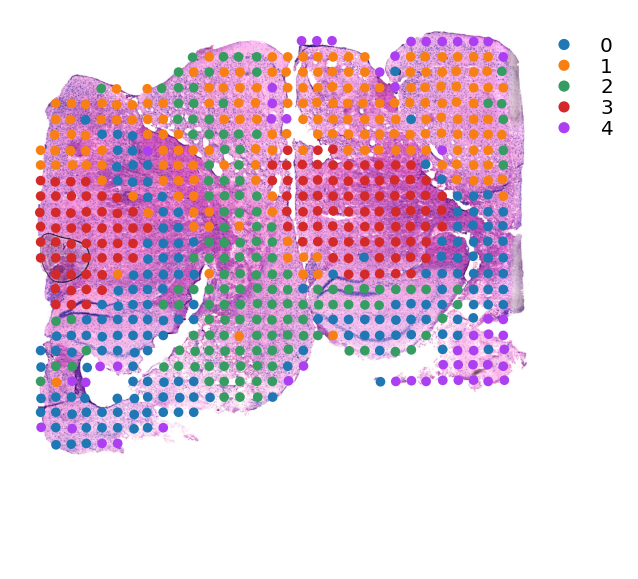

In [16]:
st.pl.cluster_plot(data,use_label="kmeans",tissue_alpha=1,spot_size=15,show_legend=True)